# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from ratelimit import limits
import time
import json
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [17]:
# Setup API Calling
# url
url = "http://api.openweathermap.org/data/2.5/weather?"
# url = "https://openweathermap.org/api"

# units
unit = "units=Imperial"

# api
api = "&APPID=" + weather_api_key

# response 
response = requests.get( url + unit + api).json()

# print statement
print(response)

# Storage for api call data
city_info = {"City": [], 
             "Lat": [], 
             "Lng": [],
             "Max Temp": [],
             "Humidity": [],
             "Cloudiness": [],
             "Wind Speed": [],
             "Country": [], 
             "Date": []}

# hint, limit api calls
minute = 60
@limits(calls=60, period=minute)

# api call loop
def call_api():
    
    for i, city in enumerate(cities):
        city = requests.get(url + unit + "&q=" + cities[i] + api).json()
        
        try:
            print("Processing city " + str(i) + ": " + city["name"])
        
            city_info["City"].append(city["name"])
            city_info["Lat"].append(city["coord"]["lat"])
            city_info["Lng"].append(city["coord"]["lon"])
            city_info["Max Temp"].append(city["main"]["temp_max"])
            city_info["Humidity"].append(city["main"]["humidity"])
            city_info["Cloudiness"].append(city["clouds"]["all"])
            city_info["Wind Speed"].append(city["wind"]["speed"])
            city_info["Country"].append(city["sys"]["country"])
            city_info["Date"].append(city["dt"])
            
        except:
            print("Incomplete..., skip over missing city info.")
            pass
    print("Complete")
    
call_api()


            
            
        

{'cod': '400', 'message': 'Nothing to geocode'}
Processing city 0: Cabedelo
Processing city 1: Mehamn
Processing city 2: Baruun-Urt
Processing city 3: Rikitea
Processing city 4: Chokurdakh
Processing city 5: Berlevåg
Processing city 6: Cabo San Lucas
Processing city 7: Kapaa
Processing city 8: Lompoc
Incomplete..., skip over missing city info.
Incomplete..., skip over missing city info.
Processing city 11: Port Alfred
Processing city 12: Albany
Processing city 13: Kaitangata
Processing city 14: Saint George
Incomplete..., skip over missing city info.
Processing city 16: Alofi
Processing city 17: Vaini
Processing city 18: Katherine
Processing city 19: Cassilândia
Processing city 20: Kloulklubed
Processing city 21: Mataura
Processing city 22: Cape Town
Processing city 23: Constitución
Processing city 24: Isangel
Processing city 25: Kamenka
Processing city 26: La Ronge
Processing city 27: Esim
Processing city 28: Sauda
Incomplete..., skip over missing city info.
Processing city 30: Chersk

Processing city 263: Vila
Processing city 264: Lewisporte
Processing city 265: Kibala
Processing city 266: Vostok
Processing city 267: Lagoa
Processing city 268: Yar-Sale
Processing city 269: Avera
Processing city 270: Gallup
Processing city 271: Chengam
Processing city 272: Pevek
Incomplete..., skip over missing city info.
Processing city 274: Pacific Grove
Processing city 275: Laramie
Processing city 276: Narganá
Processing city 277: Kargasok
Processing city 278: Auki
Processing city 279: Maralal
Processing city 280: Maidens
Processing city 281: Chernihiv
Processing city 282: Kālīnagar
Processing city 283: Bahía Blanca
Processing city 284: Ternate
Processing city 285: Inírida
Processing city 286: Araouane
Processing city 287: Shepsi
Processing city 288: Sinop Province
Processing city 289: Nuevitas
Processing city 290: Quatre Cocos
Processing city 291: Ryōtsu-minato
Processing city 292: Ribeira Grande
Processing city 293: Sawtell
Processing city 294: Fuyang
Processing city 295: Pueblo

Processing city 520: Lázaro Cárdenas
Processing city 521: Tolaga Bay
Processing city 522: Kavieng
Processing city 523: ‘Ewa Beach
Processing city 524: Bay Roberts
Processing city 525: Batagay-Alyta
Processing city 526: Ust-Nera
Processing city 527: Aberdeen
Processing city 528: Mujiayingzi
Processing city 529: Fukuechō
Processing city 530: Maţāy
Processing city 531: Saint-André-Avellin
Processing city 532: Yulara
Processing city 533: Tessalit
Processing city 534: Basoko
Processing city 535: Seymchan
Processing city 536: Havre-St-Pierre
Processing city 537: Prince Rupert
Processing city 538: Jalu
Processing city 539: Alcântara
Processing city 540: Gamba
Processing city 541: Mayo
Processing city 542: San Patricio
Processing city 543: Kahului
Processing city 544: Bang Saphan
Incomplete..., skip over missing city info.
Processing city 546: Palmerston
Processing city 547: Vila Velha
Processing city 548: Ixtapa
Processing city 549: Guarapari
Incomplete..., skip over missing city info.
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Creating DataFrame
city_info_df = pd.DataFrame(city_info)

# Clean DataFrame
city_info_df["Max Temp"] = city_info_df["Max Temp"].replace('', np.nan)
city_info_df = city_info_df.dropna()

# Export as CSV file
city_info_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Inspect DataFrame
city_info_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabedelo,-6.9811,-34.8339,81.27,70,6,13.00,BR,1644188983
1,Mehamn,71.0357,27.8492,21.11,86,30,13.53,NO,1644188685
2,Baruun-Urt,46.6806,113.2792,-1.95,90,8,6.69,MN,1644188984
3,Rikitea,-23.1203,-134.9692,79.30,70,3,17.92,PF,1644188813
4,Chokurdakh,70.6333,147.9167,-40.67,100,85,2.66,RU,1644188808
...,...,...,...,...,...,...,...,...,...
559,Yermakovskoye,53.2831,92.4003,-4.43,96,98,1.50,RU,1644189186
560,Iqaluit,63.7506,-68.5145,-38.31,65,67,8.01,CA,1644189012
561,Tuy Hoa,13.0833,109.3000,70.86,92,86,4.68,VN,1644189054
562,Batesville,35.7698,-91.6410,45.01,58,0,5.99,US,1644189186


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
# Table Columns
lat = city_info_df["Lat"]
max_temp = city_info_df["Max Temp"]
humidity = city_info_df["Humidity"]
cloudiness = city_info_df["Cloudiness"]
wind_speed = city_info_df["Wind Speed"]

In [21]:
#  Get the indices of cities that have humidity over 100%.
city_info_df["Humidity"]

0       70
1       86
2       90
3       70
4      100
      ... 
559     96
560     65
561     92
562     58
563     47
Name: Humidity, Length: 564, dtype: int64

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity'>

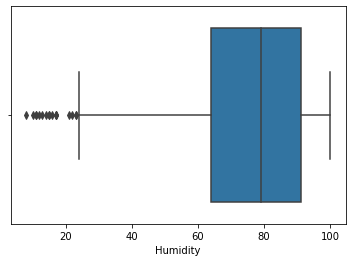

In [22]:
# Couldn't figure out how to use plot_filtered to fix FutureWarning
sns.boxplot(city_info_df["Humidity"])



In [23]:
# Print Outlier (if one exists)
print(np.where(city_info_df["Humidity"] > 100))
# Array is empty, no 'Humidity' over 100% exists in current dataset.

(array([], dtype=int64),)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

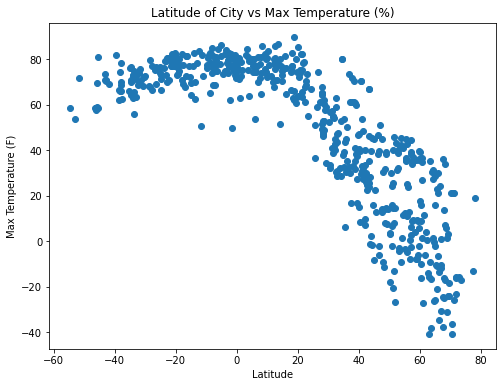

In [30]:
# Latitude vs Temperature
# viz config
plt.figure(figsize=(8,6))
plt.scatter(lat, max_temp, linewidths=1, marker="o")

# titles & labels
plt.title("Latitude of City vs Max Temperature (%)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

In [31]:
# Save fig
plt.savefig("images/Fig1.png")

FileNotFoundError: [Errno 2] No such file or directory: 'images/Fig1.png'

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression